**Pre-processing, Training and Modelling -- Capstone 2 -- Predicting house prices**

In [95]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# pd.set_option('max_columns', 100)

In [96]:
df = pd.read_csv(r"D:\Data_Science\SecondCapstoneProjectDS\New folder\EDA_data_final.csv")

In [97]:
df.head()

,Unnamed: 0,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Rupees,BHK,Carpet_Area_sqft,Super Area (sqft)
0,0,9646.0,kolkata,Ready to Move,2 out of 4,New Property,Unfurnished,Unknown,Main Road,One Rajarhat,2.0,2.0,1 Covered,Freehold,12000000.0,2.0,740.0,1314.654894
1,1,4062.0,bangalore,Ready to Move,4 out of 4,Resale,Semi-Furnished,East,Unknown,Unknown,2.0,2.0,Not Specified,Unknown,6500000.0,2.0,1050.0,1314.654894
2,2,4900.0,dehradun,Ready to Move,1 out of 3,Resale,Semi-Furnished,Unknown,Unknown,Unknown,4.0,2.0,Not Specified,Unknown,9800000.0,3.0,0.0,2000.000000
3,3,2700.0,raipur,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,4440000.0,3.0,1300.0,1314.654894
4,4,7666.0,kolkata,Ready to Move,12 out of 20,Resale,Semi-Furnished,East,Main Road,Diamond City South,2.0,2.0,1 Open,Freehold,11000000.0,3.0,0.0,1435.000000


In [98]:
# Create dummy or indicator features for categorical variables
# Standardize the magnitude of numeric features using a scaler
# Split your data into testing and training datasets
# Making a Scaler object
# scaler = preprocessing.StandardScaler()
# # Fitting data to the scaler object
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=names)

In [99]:
# dummies = pd.get_dummies(df.Ownership)
# dummies

In [100]:
# using get_dummies function to create dummy feature of the following columns
col_dummies=['Status', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df_encoded = pd.get_dummies(df, columns=col_dummies, drop_first=True)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,...,overlooking_Pool,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,12000000.0,2.0,...,False,False,False,False,False,False,True,False,False,False
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,6500000.0,2.0,...,False,False,False,False,False,True,False,False,False,True
2,2,4900.0,dehradun,1 out of 3,Unknown,4.0,2.0,Not Specified,9800000.0,3.0,...,False,False,False,False,False,True,False,False,False,True
3,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,4440000.0,3.0,...,False,False,False,False,False,False,False,False,False,False
4,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,11000000.0,3.0,...,False,False,False,False,False,False,True,False,False,False


In [101]:
dummy_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[dummy_cols]=df_encoded[dummy_cols].astype(int)
df_encoded

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,...,overlooking_Pool,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,12000000.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,6500000.0,2.0,...,0,0,0,0,0,1,0,0,0,1
2,2,4900.0,dehradun,1 out of 3,Unknown,4.0,2.0,Not Specified,9800000.0,3.0,...,0,0,0,0,0,1,0,0,0,1
3,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,4440000.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,11000000.0,3.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,13726,2659.0,jaipur,4 out of 12,Vatika Jaipur 21,3.0,3.0,1 Covered,4890000.0,3.0,...,0,0,0,0,0,0,1,0,0,0
13069,13727,5143.0,visakhapatnam,5 out of 5,Unknown,2.0,2.0,Not Specified,5800000.0,3.0,...,0,0,0,0,0,1,1,0,0,0
13070,13728,13766.0,bangalore,11 out of 18,Unknown,3.0,3.0,2 Covered,31000000.0,4.0,...,0,0,0,0,0,0,1,0,0,0
13071,13729,5000.0,varanasi,Lower Basement out of 1,Unknown,1.0,2.0,Not Specified,20000000.0,1.0,...,0,0,0,0,0,1,0,0,0,1


In [102]:
# from sklearn.preprocessing import LabelEncoder
# # Function to perform Label Encoding for multiple columns
# def label_encode_multiple(df_encoded, columns):
#     le = LabelEncoder()
#     for column in columns:
#         df_encoded[column] = le.fit_transform(df_encoded[column])
#     return df_encoded

# label_encode_columns = ['Society', 'location']
# df = label_encode_multiple(df_encoded, label_encode_columns)

In [103]:
mean_price = df_encoded.groupby('location')['Price (in rupees)'].mean()
df_encoded['location_target'] = df_encoded['location'].map(mean_price)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,...,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,12000000.0,2.0,...,0,0,0,0,0,1,0,0,0,5809.442105
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,6500000.0,2.0,...,0,0,0,0,1,0,0,0,1,7252.792746
2,2,4900.0,dehradun,1 out of 3,Unknown,4.0,2.0,Not Specified,9800000.0,3.0,...,0,0,0,0,1,0,0,0,1,5197.066327
3,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,4440000.0,3.0,...,0,0,0,0,0,0,0,0,0,3243.304348
4,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,11000000.0,3.0,...,0,0,0,0,0,1,0,0,0,5809.442105


In [104]:
mean_price = df_encoded.groupby('Society')['Price (in rupees)'].mean()
df_encoded['Society_target'] = df_encoded['Society'].map(mean_price)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,...,"overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target,Society_target
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,12000000.0,2.0,...,0,0,0,0,1,0,0,0,5809.442105,9646.000000
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,6500000.0,2.0,...,0,0,0,1,0,0,0,1,7252.792746,5941.058230
2,2,4900.0,dehradun,1 out of 3,Unknown,4.0,2.0,Not Specified,9800000.0,3.0,...,0,0,0,1,0,0,0,1,5197.066327,5941.058230
3,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,4440000.0,3.0,...,0,0,0,0,0,0,0,0,3243.304348,2730.000000
4,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,11000000.0,3.0,...,0,0,0,0,1,0,0,0,5809.442105,7150.333333


In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
df_encoded['Floor'].unique()

array(['2 out of 4', '4 out of 4', '1 out of 3', '1 out of 8',
       '12 out of 20', '10 out of 13', '3 out of 6', '1 out of 1',
       '7 out of 15', '6 out of 11', '1 out of 5', '2 out of 14',
       '5 out of 14', '4 out of 5', '1 out of 2', '7 out of 14',
       '7 out of 9', '3 out of 10', '8 out of 10', '6 out of 30',
       '6 out of 18', 'Ground out of 5', '4 out of 10', '4 out of 8',
       '6 out of 14', '10 out of 15', '5 out of 5', '3 out of 7',
       '3 out of 4', '1 out of 4', '3 out of 16', '7 out of 32',
       '5 out of 15', '15 out of 51', '8 out of 13', '2 out of 7',
       '7 out of 19', '4 out of 21', 'Ground out of 10', '12 out of 14',
       '6 out of 8', '3 out of 5', '4 out of 17', '5 out of 6',
       '14 out of 19', '10 out of 11', '4 out of 35', '3 out of 3',
       '2 out of 5', '13 out of 14', '1 out of 11', '1 out of 7',
       '2 out of 2', 'Ground out of 4', '10 out of 17', '5 out of 20',
       '11 out of 19', '4 out of 7', '6 out of 10', '9 out of 9

In [107]:
# df_encoded['Floor'].unique()

In [108]:
def extract_floor(x):
    x = str(x)
    if 'Ground' in x:
        return 0
    elif 'Upper Basement' in x:
        return 1
    elif 'Lower Basement' in x:
        return -1
    else:
        return int(x.split(' out of ')[0])

df_encoded['Floor_No'] = df_encoded['Floor'].apply(extract_floor)

In [109]:
def extract_total_floors(x):
    x = str(x)
    if 'out of' in x:
        return int(x.split(' out of ')[-1])
    elif 'Ground' in x:
        return 1  # usually 1 floor
    elif 'Upper Basement' in x:
        return 1  # assuming 1 floor below
    elif 'Lower Basement' in x:
        return 1
    else:
        return np.nan  # if totally missing or unknown

df_encoded['Total_floors'] = df_encoded['Floor'].apply(extract_total_floors)

In [110]:
df_encoded['Total_floors'].unique()

array([ 4.,  3.,  8., 20., 13.,  6.,  1., 15., 11.,  5., 14.,  2.,  9.,
       10., 30., 18.,  7., 16., 32., 51., 19., 21., 17., 35., 28., 12.,
       24., 26., 23., 22., 29., 25., 34., 27., 31., 40., 36., 33., 43.,
       45., 38., 41., 44., 60., 37., 42., nan, 39., 50., 48., 52.])

In [111]:
df_encoded['Car_Parking'].unique()

array(['1 Covered', 'Not Specified', '1 Open', '1 Covered,', '2 Covered',
       '2 Covered,', '2 Open', '10 Open', '34 Covered', '3 Covered',
       '23 Open', '303 Open', '90 Covered,', '234 Covered', '211 Covered',
       '300 Open', '601 Covered', '402 Covered', '45 Open', '5 Covered',
       '3 Covered,', '12 Covered', '4 Open', '8 Covered', '509 Covered,',
       '20 Covered,', '6 Covered', '50 Open', '100 Covered',
       '111 Covered', '653 Open', '16 Covered', '4 Covered', '8 Open',
       '500 Open', '180 Covered', '5 Open', '301 Covered', '5 Covered,',
       '10 Covered', '3 Open', '123 Covered', '4 Covered,', '103 Open',
       '112 Covered', '202 Covered', '101 Covered', '14 Open',
       '502 Covered', '25 Covered', '7 Covered', '203 Covered',
       '7 Covered,', '108 Covered', '45 Covered', '323 Covered',
       '103 Covered', '9 Covered', '151 Open', '204 Covered',
       '411 Covered', '413 Covered', '129 Open', '233 Open',
       '505 Covered', '306 Covered', '80 Co

In [112]:
# # Create one LabelEncoder instance
# le = LabelEncoder()

# # Apply Label Encoding to the selected columns
# for column in ['Car_Parking']:
#     df_encoded[column] = le.fit_transform(df_encoded[column])


le=LabelEncoder()
df_encoded['Car_Parking']=le.fit_transform(df_encoded['Car_Parking'])

In [113]:
df_final = df_encoded.drop(['location', 'Society', 'Floor'], axis=1)

In [114]:
df_final.columns

Index(['Unnamed: 0', 'Price (in rupees)', 'Bathroom', 'Balcony', 'Car_Parking',
       'Amount_in_Rupees', 'BHK', 'Carpet_Area_sqft', 'Super Area (sqft)',
       'Transaction_Other', 'Transaction_Rent/Lease', 'Transaction_Resale',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished', 'facing_North',
       'facing_North - East', 'facing_North - West', 'facing_South',
       'facing_South - East', 'facing_South -West', 'facing_Unknown',
       'facing_West', 'overlooking_Garden/Park, Main Road',
       'overlooking_Garden/Park, Main Road, Pool',
       'overlooking_Garden/Park, Pool',
       'overlooking_Garden/Park, Pool, Main Road', 'overlooking_Main Road',
       'overlooking_Main Road, Garden/Park',
       'overlooking_Main Road, Garden/Park, Pool',
       'overlooking_Main Road, Pool',
       'overlooking_Main Road, Pool, Garden/Park', 'overlooking_Pool',
       'overlooking_Pool, Garden/Park',
       'overlooking_Pool, Garden/Park, Main Road',
       'overlooking_Pool, Mai

In [115]:
df_final.head()

,Unnamed: 0,Price (in rupees),Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,Carpet_Area_sqft,Super Area (sqft),Transaction_Other,...,"overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target,Society_target,Floor_No,Total_floors
0,0,9646.0,2.0,2.0,0,12000000.0,2.0,740.0,1314.654894,0,...,0,0,1,0,0,0,5809.442105,9646.000000,2,4.0
1,1,4062.0,2.0,2.0,83,6500000.0,2.0,1050.0,1314.654894,0,...,0,1,0,0,0,1,7252.792746,5941.058230,4,4.0
2,2,4900.0,4.0,2.0,83,9800000.0,3.0,0.0,2000.000000,0,...,0,1,0,0,0,1,5197.066327,5941.058230,1,3.0
3,3,2700.0,3.0,2.0,0,4440000.0,3.0,1300.0,1314.654894,0,...,0,0,0,0,0,0,3243.304348,2730.000000,1,8.0
4,4,7666.0,2.0,2.0,2,11000000.0,3.0,0.0,1435.000000,0,...,0,0,1,0,0,0,5809.442105,7150.333333,12,20.0


In [116]:
df_eng=df_final.copy()
df_eng

,Unnamed: 0,Price (in rupees),Bathroom,Balcony,Car_Parking,Amount_in_Rupees,BHK,Carpet_Area_sqft,Super Area (sqft),Transaction_Other,...,"overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target,Society_target,Floor_No,Total_floors
0,0,9646.0,2.0,2.0,0,12000000.0,2.0,740.0,1314.654894,0,...,0,0,1,0,0,0,5809.442105,9646.000000,2,4.0
1,1,4062.0,2.0,2.0,83,6500000.0,2.0,1050.0,1314.654894,0,...,0,1,0,0,0,1,7252.792746,5941.058230,4,4.0
2,2,4900.0,4.0,2.0,83,9800000.0,3.0,0.0,2000.000000,0,...,0,1,0,0,0,1,5197.066327,5941.058230,1,3.0
3,3,2700.0,3.0,2.0,0,4440000.0,3.0,1300.0,1314.654894,0,...,0,0,0,0,0,0,3243.304348,2730.000000,1,8.0
4,4,7666.0,2.0,2.0,2,11000000.0,3.0,0.0,1435.000000,0,...,0,0,1,0,0,0,5809.442105,7150.333333,12,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,13726,2659.0,3.0,3.0,0,4890000.0,3.0,0.0,1840.000000,0,...,0,0,1,0,0,0,4361.556918,2706.750000,4,12.0
13069,13727,5143.0,2.0,2.0,83,5800000.0,3.0,1138.0,1314.654894,0,...,0,1,1,0,0,0,4881.050633,5941.058230,5,5.0
13070,13728,13766.0,3.0,3.0,24,31000000.0,4.0,2200.0,1314.654894,0,...,0,0,1,0,0,0,7252.792746,5941.058230,11,18.0
13071,13729,5000.0,1.0,2.0,83,20000000.0,1.0,0.0,4000.000000,0,...,0,1,0,0,0,1,5237.580000,5941.058230,-1,1.0


In [117]:
#feature engineering 
df_eng['Carpet_to_Super_Ratio'] = df_eng['Carpet_Area_sqft'] / df_eng['Super Area (sqft)']
df_eng['Rooms_per_Bathroom'] = df_eng['BHK'] / (df_eng['Bathroom'] + 1e-6)
df_eng['Balcony_per_BHK'] = df_eng['Balcony'] / (df_eng['BHK'] + 1e-6)
df_eng['Has_Parking'] = (df_eng['Car_Parking'] > 0).astype(int)
df_eng['Floor_Position'] = df_eng['Floor_No'] / (df_eng['Total_floors'] + 1e-6)
df_eng['Is_Penthouse'] = (df_eng['Floor_No'] == df_eng['Total_floors']).astype(int)
df_eng['Is_GroundFloor'] = (df_eng['Floor_No'] == 1).astype(int)
df_eng.columns

Index(['Unnamed: 0', 'Price (in rupees)', 'Bathroom', 'Balcony', 'Car_Parking',
       'Amount_in_Rupees', 'BHK', 'Carpet_Area_sqft', 'Super Area (sqft)',
       'Transaction_Other', 'Transaction_Rent/Lease', 'Transaction_Resale',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished', 'facing_North',
       'facing_North - East', 'facing_North - West', 'facing_South',
       'facing_South - East', 'facing_South -West', 'facing_Unknown',
       'facing_West', 'overlooking_Garden/Park, Main Road',
       'overlooking_Garden/Park, Main Road, Pool',
       'overlooking_Garden/Park, Pool',
       'overlooking_Garden/Park, Pool, Main Road', 'overlooking_Main Road',
       'overlooking_Main Road, Garden/Park',
       'overlooking_Main Road, Garden/Park, Pool',
       'overlooking_Main Road, Pool',
       'overlooking_Main Road, Pool, Garden/Park', 'overlooking_Pool',
       'overlooking_Pool, Garden/Park',
       'overlooking_Pool, Garden/Park, Main Road',
       'overlooking_Pool, Mai

In [118]:
df_eng=df_eng.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [119]:
#checking missing values
df_eng=df_eng.dropna(subset=['Total_floors'])
df_eng.isna().sum()

Price (in rupees)                           0
Bathroom                                    0
Balcony                                     0
Car_Parking                                 0
Amount_in_Rupees                            0
BHK                                         0
Carpet_Area_sqft                            0
Super Area (sqft)                           0
Transaction_Other                           0
Transaction_Rent/Lease                      0
Transaction_Resale                          0
Furnishing_Semi-Furnished                   0
Furnishing_Unfurnished                      0
facing_North                                0
facing_North - East                         0
facing_North - West                         0
facing_South                                0
facing_South - East                         0
facing_South -West                          0
facing_Unknown                              0
facing_West                                 0
overlooking_Garden/Park, Main Road

In [120]:
print(df_eng['Amount_in_Rupees'].describe())

count    1.306800e+04
mean     8.883646e+06
std      7.558884e+06
min      1.500000e+06
25%      4.200000e+06
50%      6.500000e+06
75%      1.050000e+07
max      5.000000e+07
Name: Amount_in_Rupees, dtype: float64


In [121]:
#train test split

from sklearn.model_selection import train_test_split

X=df_eng.drop(['Price (in rupees)'], axis=1)
y=df_eng[['Price (in rupees)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [122]:
#scale data

from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Model0**

In [123]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

y_train_cr = y_train / 1e7
y_test_cr = y_test / 1e7

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train_cr)

y_pred_dummy = dummy.predict(X_test_scaled)

mse_dummy = mean_squared_error(y_test_cr, y_pred_dummy)
# mae_dummy = mean_absolute_error(y_test_log, y_pred_dummy)
r2_dummy = r2_score(y_test_cr, y_pred_dummy)

print("Dummy MSE:", mse_dummy)
# print("Dummy MAE:", mae_dummy)
print("Dummy R2:", r2_dummy)

Dummy MSE: 1.2316474236004395e-07
Dummy R2: -0.0007772250839799266


**Model1** Linear regression 

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the model1
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train_cr)

LinearRegression()

In [125]:
#predict using the model 
y_pred_lr = model1.predict(X_test_scaled)

In [126]:
#calculating metrics 
mse_lr = mean_squared_error(y_test_cr, y_pred_lr)
r2_lr = r2_score(y_test_cr, y_pred_lr)
mae_lr = mean_absolute_error(y_test_cr, y_pred_lr)
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

Mean Squared Error: 14.16
Mean Absolute Error: 0.06
R-squared: -115051473.87


In [127]:
from sklearn.model_selection import cross_val_score

cv_scores_train1= cross_val_score(model1,X_train_scaled,y_train,cv=5, scoring='r2')
cv_scores_test1= cross_val_score(model1,X_test_scaled,y_test,cv=5)
print(cv_scores_test1)
print(cv_scores_train1)
cv_scores_lr_test= cv_scores_test1.mean()
cv_scores_lr_train= cv_scores_train1.mean()
cv_scores_std_test_lr= cv_scores_test1.std()
print ('Mean cross-validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross-validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[-4.81147431e+22 -7.46067422e+07  7.39363410e-01  7.94297953e-01
  8.09659744e-01]
[-5.96469078e+23 -3.24750534e+16  8.09182804e-01  7.97266382e-01
  8.07840211e-01]
Mean cross-validation test score: -9.622948616234997e+21
Mean cross-validation train score: -1.1929382199630997e+23
Standard deviation in cv test scores: 1.924589723246995e+22


In [128]:
Accuracy_lr=model1.score(X_test_scaled, y_test_cr)
print("Model Accuracy (R²):", Accuracy_lr)

Model Accuracy (R²): -115051473.86825718


**Model2**


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [130]:
y_pred_rf=rf_model.predict(X_test_scaled)

In [131]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

Mean Absolute Error (MAE): 560.77
Mean Squared Error (MSE): 1362696.25
R-squared (R²): 0.89


In [132]:
from sklearn.model_selection import cross_val_score

cv_scores_test2= cross_val_score(rf_model,X_test_scaled,y_test,cv=5)
cv_scores_train2= cross_val_score(rf_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test2)
print(cv_scores_train2)
cv_scores_rf_test= cv_scores_test2.mean()
cv_scores_rf_train= cv_scores_train2.mean()
cv_scores_std_test_rf= cv_scores_test2.std()
print ('Mean cross-validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross-validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

[0.85185661 0.84160328 0.80702846 0.85500309 0.89295725]
[0.87479817 0.87615487 0.90414196 0.88442884 0.88840753]
Mean cross-validation test score: 0.8496897378194463
Mean cross-validation train score: 0.8855862746561968
Standard deviation in cv test scores: 0.027533178685803485


In [133]:
Accuracy_rf=rf_model.score(X_test_scaled, y_test)
print("Model Accuracy (R²):", Accuracy_rf)

Model Accuracy (R²): 0.8892738830238527


**Model3** Ridge Regression 

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train_scaled, y_train)

y_pred_rm=ridge_model.predict(X_test_scaled)

mse_rm=mean_squared_error(y_test, y_pred_rm)
R2_rm=r2_score(y_test, y_pred_rm)
print(f"Mean Squared Error: {mse_rm}")
print(f"R-squared (R²): {R2_rm:.2f}")


Mean Squared Error: 2690613.835653576
R-squared (R²): 0.78


In [135]:
from sklearn.linear_model import RidgeCV
alphas = [0.01, 0.1, 1, 10.0, 100, 1000]
ridge_cv=RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10.0, 100, 1000])

In [136]:
print("Best alpha:", ridge_cv.alpha_)
print("Train R²:", ridge_cv.score(X_train_scaled, y_train))
print("Test R²:", ridge_cv.score(X_test_scaled, y_test))

Best alpha: 10.0
Train R²: 0.8009687207876328
Test R²: 0.7814912067370252


In [137]:
cv_scores_test3=cross_val_score(ridge_model, X_test_scaled, y_test, cv=5)
cv_scores_train3= cross_val_score(ridge_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test3)
print(cv_scores_train3)
cv_scores_rm_test= cv_scores_test3.mean()
cv_scores_rm_train= cv_scores_train3.mean()
cv_scores_std_test_rm= cv_scores_test3.std()
print ('Mean cross-validation test score: ' +str(cv_scores_rm_test))
print ('Mean cross-validation train score: ' +str(cv_scores_rm_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rm))

[0.77926862 0.76821605 0.73902303 0.79512321 0.80769908]
[0.80144094 0.77889412 0.8093738  0.79689931 0.80711684]
Mean cross-validation test score: 0.7778659994182104
Mean cross-validation train score: 0.7987450009267919
Standard deviation in cv test scores: 0.023629170821994727


In [138]:
Accuracy_rm=ridge_model.score(X_test_scaled, y_test)
print("Model Accuracy (R²):", Accuracy_rm)

Model Accuracy (R²): 0.7813737116141207


**Model4** Gradeint Boosting 

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the model
gbr_model = GradientBoostingRegressor(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # how much each tree contributes
    max_depth=4,           # depth of each individual tree
    min_samples_split=2,   # minimum samples to split
    min_samples_leaf=1,    # minimum samples per leaf
    random_state=42
)

# Fit the model
gbr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R²): {r2_gbr:.2f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Absolute Error (MAE): 582.98
Mean Squared Error (MSE): 1301051.83
Root Mean Squared Error (RMSE): 1140.64
R-squared (R²): 0.89


In [140]:
cv_scores_test4=cross_val_score(gbr_model, X_test_scaled, y_test, cv=5)
cv_scores_train4= cross_val_score(gbr_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test4)
print(cv_scores_train4)
cv_scores_gbr_test= cv_scores_test4.mean()
cv_scores_gbr_train= cv_scores_train4.mean()
cv_scores_std_test_gbr= cv_scores_test4.std()
print ('Mean cross-validation test score: ' +str(cv_scores_gbr_test))
print ('Mean cross-validation train score: ' +str(cv_scores_gbr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gbr))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

[0.873596   0.87239606 0.82425969 0.87824262 0.90689232]
[0.89289328 0.88808518 0.91076284 0.90430055 0.89322073]
Mean cross-validation test score: 0.8710773375207864
Mean cross-validation train score: 0.8978525152268423
Standard deviation in cv test scores: 0.02658581812253356


**Model5** Ada Boost

In [141]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

base_model = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=200,      # number of weak learners
    learning_rate=0.1,     # controls contribution of each tree
    random_state=42
)

# Fit model
ada_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
cv_scores_test5=cross_val_score(ada_model, X_test_scaled, y_test, cv=5)
cv_scores_train5= cross_val_score(ada_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test5)
print(cv_scores_train5)
cv_scores_ada_test= cv_scores_test5.mean()
cv_scores_ada_train= cv_scores_train5.mean()
cv_scores_std_test_ada= cv_scores_test5.std()
print ('Mean cross-validation test score: ' +str(cv_scores_ada_test))
print ('Mean cross-validation train score: ' +str(cv_scores_ada_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_ada))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.7412082  0.72011551 0.72322632 0.75445816 0.74395793]
[0.76203884 0.74473919 0.7455308  0.71947207 0.74578759]
Mean cross-validation test score: 0.7365932235709913
Mean cross-validation train score: 0.7435136981232504
Standard deviation in cv test scores: 0.012999092732444522


In [143]:
# Evaluate
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f"Mean Absolute Error (MAE): {mae_ada:.2f}")
print(f"Mean Squared Error (MSE): {mse_ada:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ada:.2f}")
print(f"R-squared (R²): {r2_ada:.2f}")

Mean Absolute Error (MAE): 1236.63
Mean Squared Error (MSE): 3036009.97
Root Mean Squared Error (RMSE): 1742.41
R-squared (R²): 0.75


***Comparing models*** 

In [144]:
name = ['Random Forest', 'Ridge Regression', 'Gradeint Boosting', 'Ada Boost']
model_score_test = [cv_scores_rf_test, cv_scores_gbr_test, cv_scores_rm_test, cv_scores_ada_test]
model_score_train=[cv_scores_rf_train, cv_scores_gbr_train, cv_scores_rm_train, cv_scores_ada_train]
model_accuracy=[Accuracy_rf, R2_rm, r2_gbr, r2_ada]

score_acc=pd.DataFrame(list(zip(name, model_accuracy)), columns=['Algorithm', 'Model Accuracy Score'])
score=pd.DataFrame(list(zip(name, model_score_train, model_score_test)), columns=['Algorithm', 'Train Score', 'Test Score'])

In [145]:
score_acc.head()

,Algorithm,Model Accuracy Score
0,Random Forest,0.889274
1,Ridge Regression,0.781374
2,Gradeint Boosting,0.894283
3,Ada Boost,0.753308


In [146]:
score

,Algorithm,Train Score,Test Score
0,Random Forest,0.885586,0.849690
1,Ridge Regression,0.897853,0.871077
2,Gradeint Boosting,0.798745,0.777866
3,Ada Boost,0.743514,0.736593


Text(0.5, 1.0, 'Comparison of Algorithms')

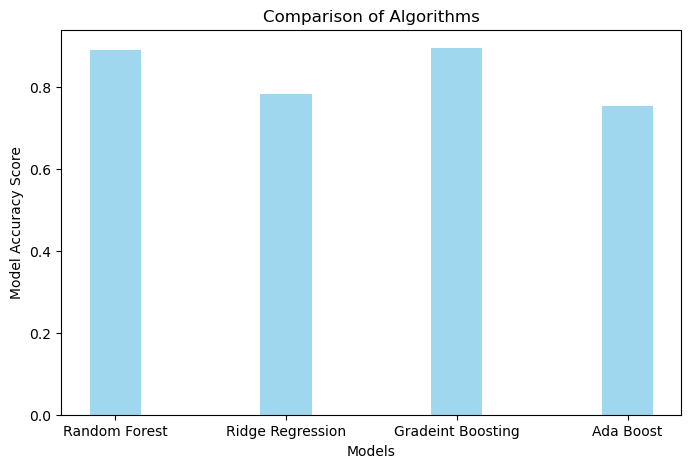

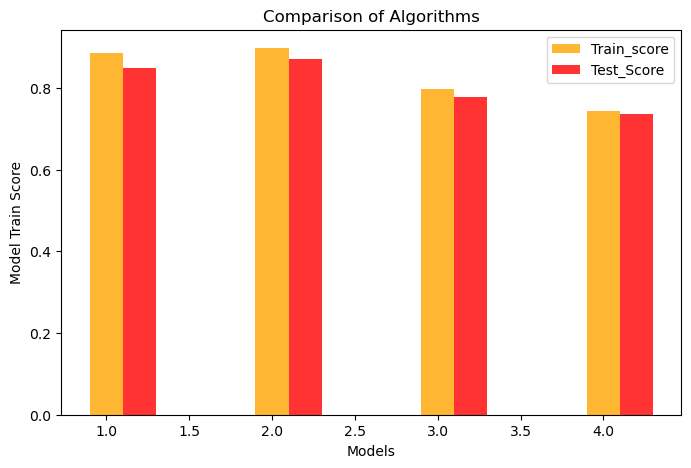

In [148]:
import matplotlib.pyplot as plt
import numpy as np

index = [1,2,3, 4]
index_acc = [1.2,2.2,3.2, 4.2]
plt.figure(figsize=(8,5))
plt.bar(score_acc['Algorithm'], score_acc['Model Accuracy Score'], color='skyblue', width=0.3, alpha=0.8)
plt.xticks(rotation=0)
plt.xlabel('Models')
plt.ylabel('Model Accuracy Score')
plt.title('Comparison of Algorithms')

plt.figure(figsize=(8,5))
_=plt.bar(index, model_score_train, color='orange', width=0.2, alpha=0.8, label='Train_score')
_=plt.bar(index_acc, model_score_test, color='red', width=0.2, alpha=0.8, label='Test_Score')
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Models')
plt.ylabel('Model Train Score')
plt.title('Comparison of Algorithms')


**Applying Random Search and Grid Search for Hyperparameter tuning**

**A. Parameter tuning for Random Forest** 

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Step 3: Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # Number of random combinations to try
    cv=5,                      # 5-fold cross-validation
    scoring='r2',              # Evaluation metric
    n_jobs=-1,                 # Use all CPU cores
    random_state=42,
    verbose=2
)

# Step 4: Fit on training data
random_search.fit(X_train_scaled, y_train)

# Step 5: Print results
print("Best Parameters:", random_search.best_params_)
print("Best CV R² Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skle

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best CV R² Score: 0.84654875142987


In [150]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=40,
    n_jobs=-1
)

best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 769.3948
MSE: 1910938.5065
R²: 0.8447


In [151]:
# param_grid = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [10, 15, 20],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters from Grid Search:", grid_search.best_params_)
# print("Best R² Score:", grid_search.best_score_)

# best_rf = grid_search.best_estimator_

# # Predict and evaluate on test set
# y_pred = best_rf.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"Final Test R²: {r2:.3f}")
# print(f"Final Test MSE: {mse:.2f}")